In [26]:
import random

In [27]:
def draw_card():
    # j q k = 10, a = 11
    deck_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
    return random.choice(deck_values)

In [28]:
def get_hand(hand):
    current_sum = sum(hand)
    ace_count = hand.count(11)

    while current_sum > 21 and ace_count > 0:
        current_sum -= 10
        ace_count -= 1

    usable_ace = (ace_count > 0)

    return current_sum, usable_ace

In [29]:
STICK = 0
HIT = 1 # actions

def generate_game(policy):
    # input: policy. output: [state, action] list, reward

    player_hand = [draw_card(), draw_card()]
    dealer_hand = [draw_card(), draw_card()]

    history = []
    # [(state, action), (state, action)...]

    while True:
        player_sum, usable_ace = get_hand(player_hand)

        dealer_card = dealer_hand[0]

        s = (player_sum, dealer_card, usable_ace)

        if player_sum > 21: # just safe coding
            return history, -1

        a = policy(s)

        history.append((s, a))

        if a == STICK:
            break
        else:
            player_hand.append(draw_card())

    player_sum, _ = get_hand(player_hand)
    dealer_sum, _ = get_hand(dealer_hand)

    # at least 17
    while dealer_sum < 17:
        dealer_hand.append(draw_card())
        dealer_sum, _ = get_hand(dealer_hand)

    reward = 0

    if dealer_sum > 21:
        reward = 1
    else:
        if player_sum > dealer_sum:
            reward = 1
        elif player_sum < dealer_sum:
            reward = -1
        else:
            reward = 0

    return history, reward

In [30]:
"""
def stupid_policy(state):
    player_sum, _, _ = state
    if player_sum < 19:
        return HIT
    else:
        return STICK

episode, reward = generate_game(stupid_policy)
print("history:", episode)
print("reward:", reward)
"""

'\ndef stupid_policy(state):\n    player_sum, _, _ = state\n    if player_sum < 19:\n        return HIT\n    else:\n        return STICK\n\nepisode, reward = generate_game(stupid_policy)\nprint("history:", episode)\nprint("reward:", reward)\n'

In [31]:
from collections import defaultdict

n_games = 50000000
epsilon = 0.1
alpha = 0.01
gamma = 1.0 # meaning im not gonna use it

Q = defaultdict(float) # input state, output prob of winning

def get_best_action(state):
    val_stick = Q[(state, STICK)]
    val_hit = Q[(state, HIT)]

    if val_hit > val_stick:
        return HIT
    else:
        return STICK

def epsilon_greedy_policy(s):
    # random exploration with epsilon prob
    if random.random() < epsilon:
        return random.choice([STICK, HIT])

    return get_best_action(s)

In [32]:
print("Training")

for i in range(1, n_games + 1):

    history, reward = generate_game(epsilon_greedy_policy)


    for s, a in history:

        sa = (s, a)

        old_val = Q[sa]
        new_val = old_val + alpha * (reward - old_val)
        Q[sa] = new_val

    if i % 100000 == 0:
        print("game", i)

print("Done.")

Training
game 100000
game 200000
game 300000
game 400000
game 500000
game 600000
game 700000
game 800000
game 900000
game 1000000
game 1100000
game 1200000
game 1300000
game 1400000
game 1500000
game 1600000
game 1700000
game 1800000
game 1900000
game 2000000
game 2100000
game 2200000
game 2300000
game 2400000
game 2500000
game 2600000
game 2700000
game 2800000
game 2900000
game 3000000
game 3100000
game 3200000
game 3300000
game 3400000
game 3500000
game 3600000
game 3700000
game 3800000
game 3900000
game 4000000
game 4100000
game 4200000
game 4300000
game 4400000
game 4500000
game 4600000
game 4700000
game 4800000
game 4900000
game 5000000
game 5100000
game 5200000
game 5300000
game 5400000
game 5500000
game 5600000
game 5700000
game 5800000
game 5900000
game 6000000
game 6100000
game 6200000
game 6300000
game 6400000
game 6500000
game 6600000
game 6700000
game 6800000
game 6900000
game 7000000
game 7100000
game 7200000
game 7300000
game 7400000
game 7500000
game 7600000
game 7700000

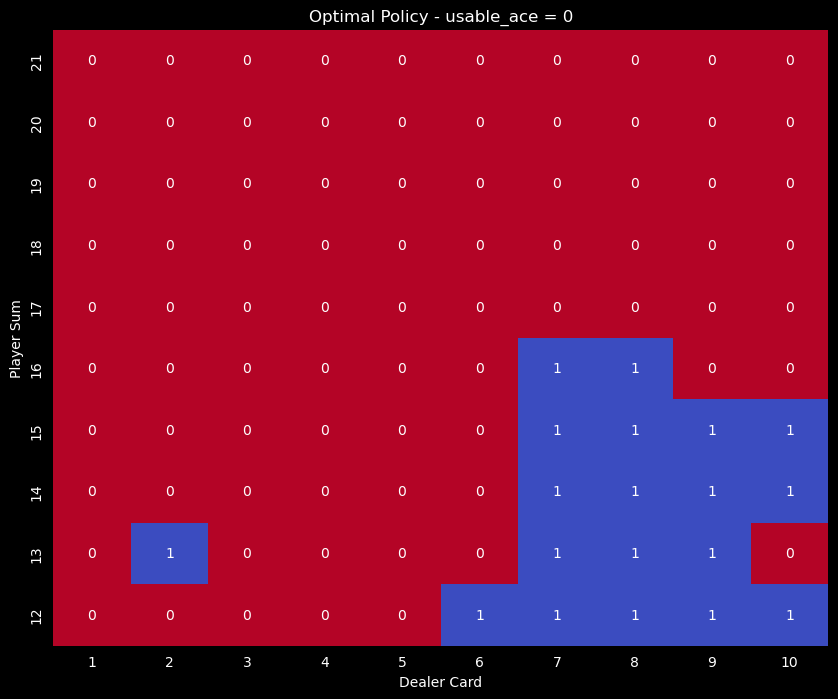

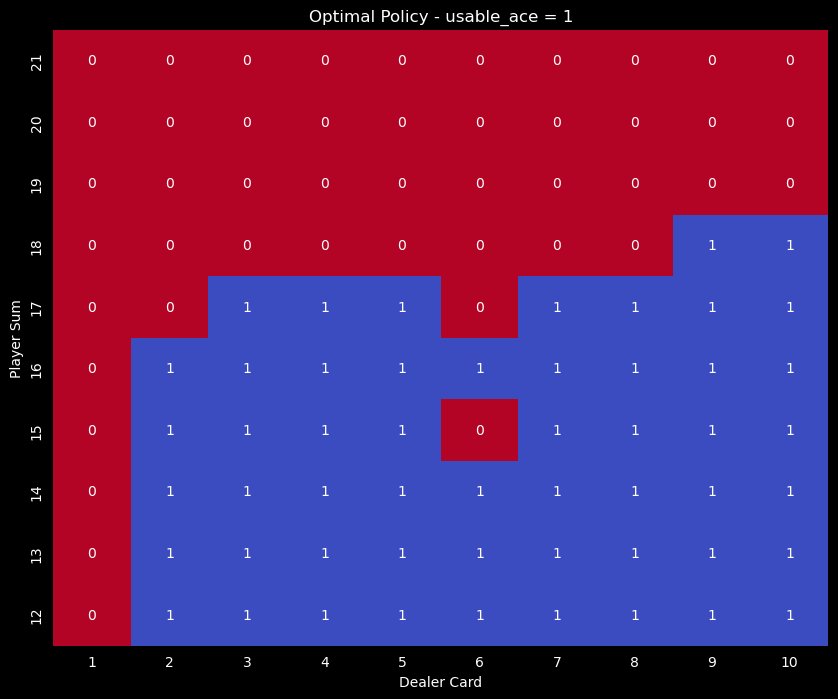

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_policy(usable_ace):
    # player_sum 12-21, dealer_sum 1-10
    policy_grid = np.zeros((10, 10))

    player_range = range(12, 22)
    dealer_range = range(1, 11) # a=1

    for i, player_sum in enumerate(player_range):
        for j, dealer_card in enumerate(dealer_range):
            state = (player_sum, dealer_card, usable_ace)

            best_action = get_best_action(state)

            policy_grid[i, j] = best_action

    plt.figure(figsize=(10, 8))
    title = "usable_ace = 1" if usable_ace else "usable_ace = 0"


    sns.heatmap(policy_grid, annot=True, fmt=".0f",
                xticklabels=dealer_range, yticklabels=player_range,
                cmap="coolwarm_r", cbar=False)

    plt.title(f"Optimal Policy - {title}")
    plt.xlabel("Dealer Card")
    plt.ylabel("Player Sum")
    plt.gca().invert_yaxis()
    plt.show()

plot_policy(usable_ace=False)
plot_policy(usable_ace=True)